<a href="https://colab.research.google.com/github/juliafremberg/berlin-marathon-analysis/blob/main/Berlin_Marathon_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 5450 Final Project
Caroline Cummings, Cameron Bosio-Kim, Julia Fremberg

## Berlin Marathon Analysis

For our final project, we investigate the potential impact of environmental factors on marathon race times. Our focus is on the Berlin Marathon, spanning from 1974 to 2019. To do this analysis, we use two distinct datasets.

**Datasets Overview:**

1. **Berlin Marathon Runner Data:** This dataset captures information on finish times, along with the demographic characteristics of the runners such as sex, age, and the respective year of participation. These records offer a view of performance metrics across decades of the Berlin Marathon.

2. **Berlin Marathon Weather Data:** This data provides comprehensive weather observations recorded during the marathon events. Key parameters include temperature metrics (average, maximum, and minimum), atmospheric pressure, precipitation levels, hours of sunshine, and cloud cover. These weather insights offer an understanding of the environmental conditions during each marathon.

**Research Objective:**

Our primary objective is to find any correlations between environmental variables—such as temperature, precipitation, sunshine, atmospheric pressure—and marathon race times. By using different models, we aim to predict finishing times based on the prevailing weather conditions and separated by gender. Through this analysis, we hope to find potential patterns and insights that could help find ideal race conditions and overall marathon performance.

**Structure of Our Notebook:**

In this notebook, we present a exploratory data analysis of the Berlin Marathon and weather datasets, using various analytical techniques and visualizations to help get to know the data. We then build three models and provide insights on the performance of each. Each section contains the thought behind our analyses, any key observations, and insights into the relationship between environmental conditions and race performance.

**Conclusion:**

We hope our findings will not only contribute to the knowledge surrounding marathon running but also offer practical implications for runners and event organizers. We're eager to share our findings with you and answer any questions you may have.

# Part 0: Importing and Data Loading

During this first step, we import the essential libraries needed in our project, for pre-processing, exploratory data analysis, and model selection. These imports predominantly include libraries like pandas, matplotlib, numpy, and sklearn.

In [ ]:
# Import libraries
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime, date
import scipy.stats as stats
import statistics as st
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
plt.style.use('ggplot')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set precision to two decimals
pd.set_option("display.precision", 2)

We found our dataset on Kaggle and downloaded it from there. We put in on our shared Google Drive so we mount our drive to load the data in.

In [ ]:
# Mount drive & sign in
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We put each of the datasets in Pandas dataframes to be processed and cleaned.

In [ ]:
# Read data files
datapath = "/content/drive/MyDrive/CIS 5450 Final Project/"
file1 = "Berlin_Marathon_data_1974_2019.csv"
file2 = "Berlin_Marathon_weather_data_since_1974.csv"
marathon_uncleaned_df = pd.read_csv(datapath + file1, sep=',')
weather_uncleaned_df = pd.read_csv(datapath + file2, sep=',')

#Part 1: Cleaning and EDA on Marathon Data

### 1.1 Marathon Race Data Inspection




Looking at the sampled data from `marathon_uncleaned_df`, we see the features that describe the runnner's and their times. We note that the country column contains a lot of `NaN`s and age and time will have to be convert to numerical values.

In [ ]:
print(marathon_uncleaned_df.dtypes)
marathon_uncleaned_df.sample(5)

YEAR        int64
COUNTRY    object
GENDER     object
AGE        object
TIME       object
dtype: object


,YEAR,COUNTRY,GENDER,AGE,TIME
33053,1986,NaN,male,55,03:18:00
52112,1987,NaN,male,20,04:22:00
690632,2014,NaN,male,45.0,04:16:39
441904,2007,NaN,male,50,03:46:14
94214,1990,NaN,male,35,03:55:00


For each column, we print the column name, the unique values present in that column, and the number of null values (if any). This helps to quickly inspect the unique values and identify any missing data in each column.

In [ ]:
# Initialize an empty dictionary to store unique values and null counts for each column
column_info = {}

# Iterate through each column in the DataFrame
for column in marathon_uncleaned_df.columns:
    # Store column name as key and unique values as value in the dictionary
    column_info[column] = {
        'Unique values': marathon_uncleaned_df[column].unique(),
        # Count null values and store the count
        'Null count': marathon_uncleaned_df[column].isnull().sum()
    }

# Print column information
for column, info in column_info.items():
    print(column)
    print('Unique values:', info['Unique values'])
    print('Null count:', info['Null count'])
    print()


YEAR
Unique values: [1974 1975 1976 1977 1979 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]
Null count: 0

COUNTRY
Unique values: [nan 'ETH' 'KEN' 'ERI' 'CHN' 'JPN' 'AUT' 'ITA' 'USA' 'SWE' 'GBR' 'TUR'
 'NED' 'IRL' 'ISR' 'MAR' 'FRA' 'CZE' 'BEL' 'GER' 'MEX' 'LTU' 'KOR' 'SUI'
 'NOR' 'LAT' 'TWN' 'GUA' 'ROU' 'GRE' 'MGL' 'FIN' 'JOR' 'ZAM' 'ESP' 'PUR'
 'HKG' 'RUS' 'COL' 'CAN' 'UKR' 'RSA' 'ARG' 'CHI' 'HUN' 'SUD' 'BRA' 'EST'
 'AUS' 'ISL' 'POR' 'DEN' 'CRC' 'POL' 'MLT' 'PER' 'SVK' 'LUX' 'LIB' 'SLO'
 'CRO' 'VEN' 'BLR' 'MDA' 'ECU' 'NZL' 'THA' 'BAH' 'ARM' 'VIE' 'ENG' 'DOM'
 'IND' 'ALG' 'NIR' 'KAZ' 'MAS' 'SRB' 'MKD' 'SIN' 'PAR' 'BOL' 'URU' 'PAN'
 'TAN' 'TUN' 'CMR' 'BIH' 'BAR' 'PLE' 'ESA' 'INA' 'GAM' 'CYP' 'REU' 'MAC'
 'UZB' 'LAO' 'BUL' 'IRI' 'EGY' 'GHA' 'MON' 'AND' 'ARU' 'ZIM' 'GLP' 'KUW'
 'AFG' 'PHI' 'TOG' 'UGA' 'HON' 'SCO' 'COD' 'NEP' 'SRI' 'SYR' '

### 1.2 Marathon Race Data Processing

We identified that the country column is predominently `NaN` so we made the decision to drop it entirely and focus on the other features of the dataset. Additionally, we process the age column which had some non-numerical values so that we drop values that are not numbers and cast them from `object` to `int`.

In [ ]:
# Drop COUNTRY column
marathon_df = marathon_uncleaned_df.drop(columns='COUNTRY')

# Make a uniform type in AGE column
marathon_df['AGE'] = pd.to_numeric(marathon_df['AGE'], errors='coerce')

# Drop rows with NaN values in the AGE column and set type as int
marathon_df = marathon_df[marathon_df['AGE'].isnull()==False]
marathon_df['AGE'] = marathon_df['AGE'].astype(int)

print("Unique values of AGE: ", marathon_df['AGE'].unique())
print("Null count of AGE: ", marathon_df['AGE'].isnull().sum())
marathon_df.head(5)

Unique values of AGE:  [20 18 35 30 40 45 50 55 60 70 65 75 80]
Null count of AGE:  0


,YEAR,GENDER,AGE,TIME
483,1976,male,20,02:36:12
487,1976,male,20,02:42:35
490,1976,male,20,02:46:08
492,1976,male,20,02:46:38
496,1976,male,20,02:49:50


In order to handle the finishing time value easier, we will convert from `HH:MM:SS` to the number of total minutes. First, we created a function that will process the time stamp using RegEx then calculated the minutes from it. Then, we apply it to the `TIME` column and store the result in a new `TIME_minutes` column.

In [ ]:
# Converts time to minutes from HH:MM:SS format
# Applied to create column TIME_minutes and returns time in minutes as a number
import re
def time_in_minutes(row):
    if row['TIME'] == 'no time':
        return np.NaN
    else:
        match = re.match(r'(\d+):(\d+):(\d+)', row['TIME'])
        if match:
            hh, mm, ss = map(int, match.groups())
            total_minutes = mm + 60 * hh + ss / 60
            return total_minutes
        else:
            return np.NaN

In [ ]:
# Create new column TIME_ss with the finish time in seconds
marathon_df['TIME_minutes'] = marathon_df.apply(time_in_minutes, axis=1)

marathon_df.dropna(subset=['TIME_minutes'], inplace=True)

print("Unique values of TIME_minutes: ", marathon_df['TIME_minutes'].unique())
print("Null count of TIME_minutes: ", marathon_df['TIME_minutes'].isnull().sum())
marathon_df.head(5)

Unique values of TIME_minutes:  [156.2        162.58333333 166.13333333 ... 432.5        435.46666667
 446.15      ]
Null count of TIME_minutes:  0


,YEAR,GENDER,AGE,TIME,TIME_minutes
483,1976,male,20,02:36:12,156.20
487,1976,male,20,02:42:35,162.58
490,1976,male,20,02:46:08,166.13
492,1976,male,20,02:46:38,166.63
496,1976,male,20,02:49:50,169.83


### 1.3 Marathon Data Post-Processing with Visuals

Comparing this data to what we had at the beginning, we see we removed any null values in the relevant columns and made type changes for easier computation later on. Note that we have a total of 869474 rows post-processing.

In [ ]:
# Initialize an empty dictionary to store unique values and null counts for each column
column_info = {}

# Iterate through each column in the DataFrame
for column in marathon_df.columns:
    # Store column name as key and unique values as value in the dictionary
    column_info[column] = {
        'Unique values': marathon_df[column].unique(),
        # Count null values and store the count
        'Null count': marathon_df[column].isnull().sum()
    }

# Print column information
for column, info in column_info.items():
    print(column)
    print('Unique values:', info['Unique values'])
    print('Null count:', info['Null count'])
    print()

print("Rows after processing: ", len(marathon_df.count(axis=1)))

YEAR
Unique values: [1976 1977 1979 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
Null count: 0

GENDER
Unique values: ['male' 'female']
Null count: 0

AGE
Unique values: [20 18 35 30 40 45 50 55 60 70 65 75 80]
Null count: 0

TIME
Unique values: ['02:36:12' '02:42:35' '02:46:08' ... '07:12:30' '07:15:28' '07:26:09']
Null count: 0

TIME_minutes
Unique values: [156.2        162.58333333 166.13333333 ... 432.5        435.46666667
 446.15      ]
Null count: 0

Rows after processing:  869474


The `describe()` method provides valuable insights into the distribution and central tendency of numeric columns, such as age, finishing time, and other relevant metrics. It gives insights to the distribution of the features of this data.

In [ ]:
marathon_df.describe()

,YEAR,AGE,TIME_minutes
count,869474.00,869474.00,869474.00
mean,2005.40,38.48,241.97
std,9.73,11.02,42.54
min,1976.00,18.00,121.65
25%,1999.00,30.00,212.00
50%,2007.00,40.00,237.60
75%,2013.00,45.00,268.08
max,2019.00,80.00,589.68


We see that there is a notable difference in the number of male and female finishers in marathons. Males consistently outnumber females in finishing the races. Additionally, we note that the gap between the number of male and female finishers appears to be widening slightly. While both genders show an increasing trend in participation.

By plotting the class imbalance variable, we see just how much men out weigh women in our dataset.

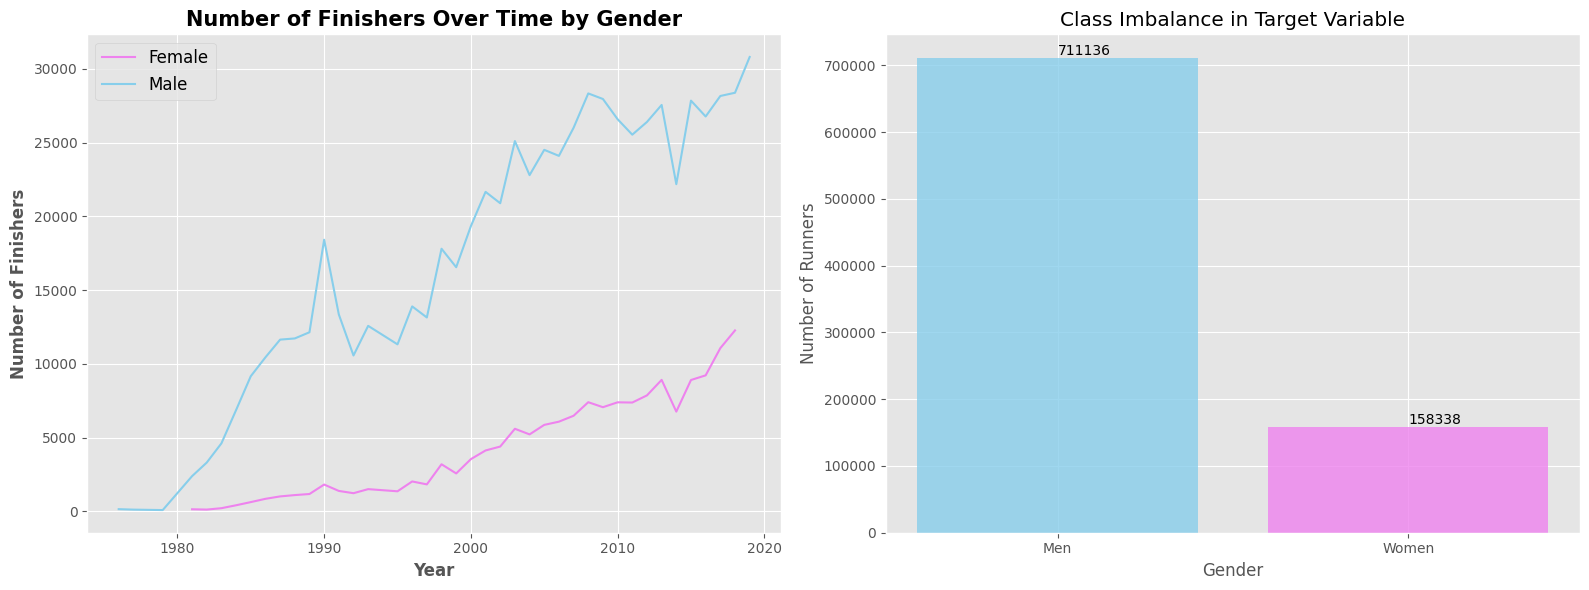

In [ ]:
# Grouping gender by year
female_finishers_by_year = marathon_df[marathon_df['GENDER']=='female'].groupby(by=['YEAR']).count()
male_finishers_by_year = marathon_df[marathon_df['GENDER']=='male'].groupby(by=['YEAR']).count()

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting Number of Finishers Over Time by Gender
axs[0].plot(female_finishers_by_year.index, female_finishers_by_year['GENDER'], label='Female', color='violet')
axs[0].plot(male_finishers_by_year.index, male_finishers_by_year['GENDER'], label='Male', color='skyblue')
axs[0].set_title("Number of Finishers Over Time by Gender", fontsize=15, fontweight='bold')
axs[0].set_xlabel('Year', fontsize='large', fontweight='bold')
axs[0].set_ylabel('Number of Finishers', fontsize='large', fontweight='bold')
axs[0].legend(loc='upper left', fontsize='large')

# Second figure - Class Imbalance
count = marathon_df['GENDER'].value_counts()

bars = axs[1].bar(count.index, count.values, color=['skyblue', 'violet'], alpha=0.8)
axs[1].set_title('Class Imbalance in Target Variable')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Number of Runners')

for bar in bars:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')
axs[1].set_xticks(count.index)
axs[1].set_xticklabels(['Men', 'Women'])

plt.tight_layout()
plt.show()

We see a relationship between age and marathon finish times for both genders. As age increases within each age group, the average finish times tend to increase as well. Again, we see females typically have a higher average finish times compared to males.

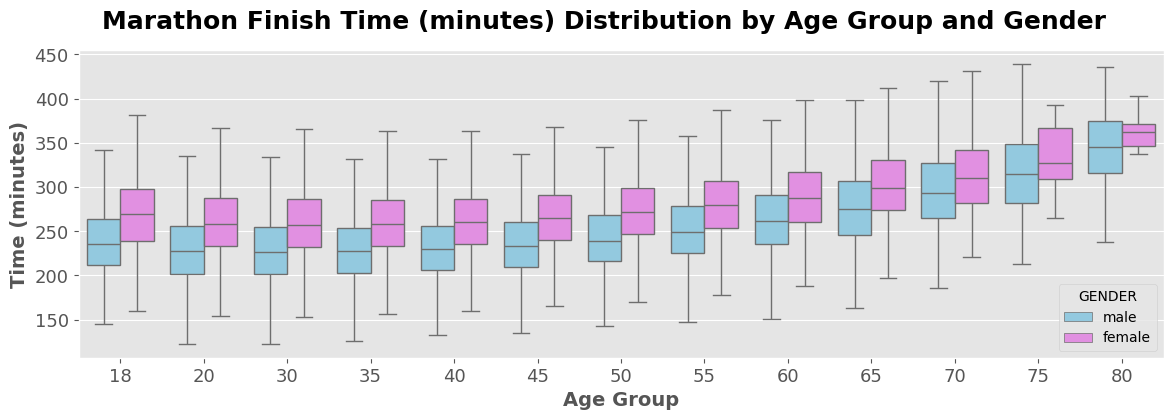

In [ ]:
# Distribution of finish times (in minutes) by age group and gender
plt.figure(figsize=(14,4))
plt.suptitle("Marathon Finish Time (minutes) Distribution by Age Group and Gender", fontsize=18, fontweight='bold')
sns.boxplot(x = "AGE",
            y = "TIME_minutes",
            hue='GENDER',
            data=marathon_df,
            palette=['skyblue', 'violet'],
            showfliers=False);
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Age Group', fontsize=14, fontweight='bold');
plt.ylabel('Time (minutes)', fontsize=14, fontweight='bold');

Based on the observations drawn from the analysis of marathon finish times by gender and age group, it's evident that there are patterns and trends that can inform the development of a predictive model to forecast finishing times. By incorporating predictors for gender and age, we can capture their effects on marathon performance. In addition to gender and age, other features may also influence marathon finish times, such as weather conditions, which we will explore next.

#Part 2: Processing and EDA on Weather Data

### 2.1 Weather Data Inspection

Looking at our weather data, we see that each column has a numerical value which will make it easy for performing computations. Additionally, the data has no null values in any of the columns meaning that we will need to do minimal cleaning on it. We have a total of 42 rows, one for every year that we have data for the marathon such that each row describes the weather conditions for a specific race in a specific year.

In [ ]:
for x in weather_uncleaned_df.columns:
  print(x)
  print('Unique values :', weather_uncleaned_df[x].unique())
  print('Null count: ', weather_uncleaned_df[x].isnull().sum())
  print()

print("Number of Rows: ", len(weather_uncleaned_df.count(axis=1)))

weather_uncleaned_df.sample(5)

YEAR
Unique values : [1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019]
Null count:  0

PRECIP_mm
Unique values : [ 0.   4.2  3.  11.2  1.8  0.1  0.7  3.9  0.5  7.   1.2  4.5  9.8  0.6
 29.8  0.3  8. ]
Null count:  0

SUNSHINE_hrs
Unique values : [ 0.2   9.4  10.2   0.    2.7   5.4  10.1   3.6   9.8   0.1   8.7   6.5
  9.9   1.8   0.9   0.7   1.9   7.4  11.4   5.7   0.6  10.6  11.3   0.8
 10.9   8.9  10.7   9.78  8.93 10.43  1.5   7.75]
Null count:  0

CLOUD_hrs
Unique values : [7.  3.  3.3 8.  6.  2.  0.7 7.3 1.  2.3 5.  5.7 0.3 4.3 4.7 6.3 7.5 6.5
 0.1 2.2 0.6 7.8 0.8 1.6 1.4 4.5 5.6 6.8]
Null count:  0

ATMOS_PRESS_mbar
Unique values : [1009.5  1011.4  1010.4  1013.1  1000.6  1019.   1017.5  1000.9  1004.
 1021.4  1004.5  1019.9  1024.7  1017.7   994.4  1014.3  1000.4   994.9
 1011.1  1010.3  1006.4  1

,YEAR,PRECIP_mm,SUNSHINE_hrs,CLOUD_hrs,ATMOS_PRESS_mbar,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C
28,2002,0.0,0.0,7.3,1020.6,12.4,16.4,9.8
12,1986,0.0,6.5,5.0,1024.7,11.1,17.8,8.0
39,2013,0.0,10.7,1.4,1008.9,8.9,15.2,4.4
23,1997,0.0,11.4,1.0,1010.3,10.0,19.0,4.6
13,1987,0.0,9.9,1.0,1017.7,9.7,15.2,4.4


### 2.2 Weather Data Brief Processing

The only processing we will do on the weather data is to reorder the columns as follows.

In [ ]:
# Reorder columns
weather_df = weather_uncleaned_df[['YEAR', 'AVG_TEMP_C', 'MAX_TEMP_C', 'MIN_TEMP_C', 'PRECIP_mm', 'ATMOS_PRESS_mbar', 'SUNSHINE_hrs', 'CLOUD_hrs']]

###2.3 Weather Data Visuals

We use `.describe()` to see the distribution for each of the features of the data.

In [ ]:
# Statistical info of the weather data
weather_df[['AVG_TEMP_C', 'MAX_TEMP_C', 'MIN_TEMP_C', 'PRECIP_mm', 'ATMOS_PRESS_mbar', 'SUNSHINE_hrs', 'CLOUD_hrs']].describe()

,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C,PRECIP_mm,ATMOS_PRESS_mbar,SUNSHINE_hrs,CLOUD_hrs
count,46.00,46.00,46.00,46.00,46.00,46.00,46.00
mean,12.70,18.02,8.33,1.98,1009.80,5.63,4.49
std,2.65,3.80,3.10,5.01,8.02,4.53,2.67
min,5.40,8.80,1.10,0.00,993.62,0.00,0.10
25%,10.88,15.40,5.55,0.00,1005.38,0.70,2.00
50%,12.75,17.65,8.65,0.00,1010.35,6.95,5.00
75%,14.30,20.25,10.62,1.07,1014.03,10.05,7.00
max,19.40,27.60,14.80,29.80,1026.80,11.40,8.00


There is noticeable variation in weather measurements from year to year, indicating that the weather conditions on the day of the marathon are not consistent, which is not surprising. However, since the marathon takes place around the same time each year, some seasonal trends may be inferred from the data like the temperature for that time of year.

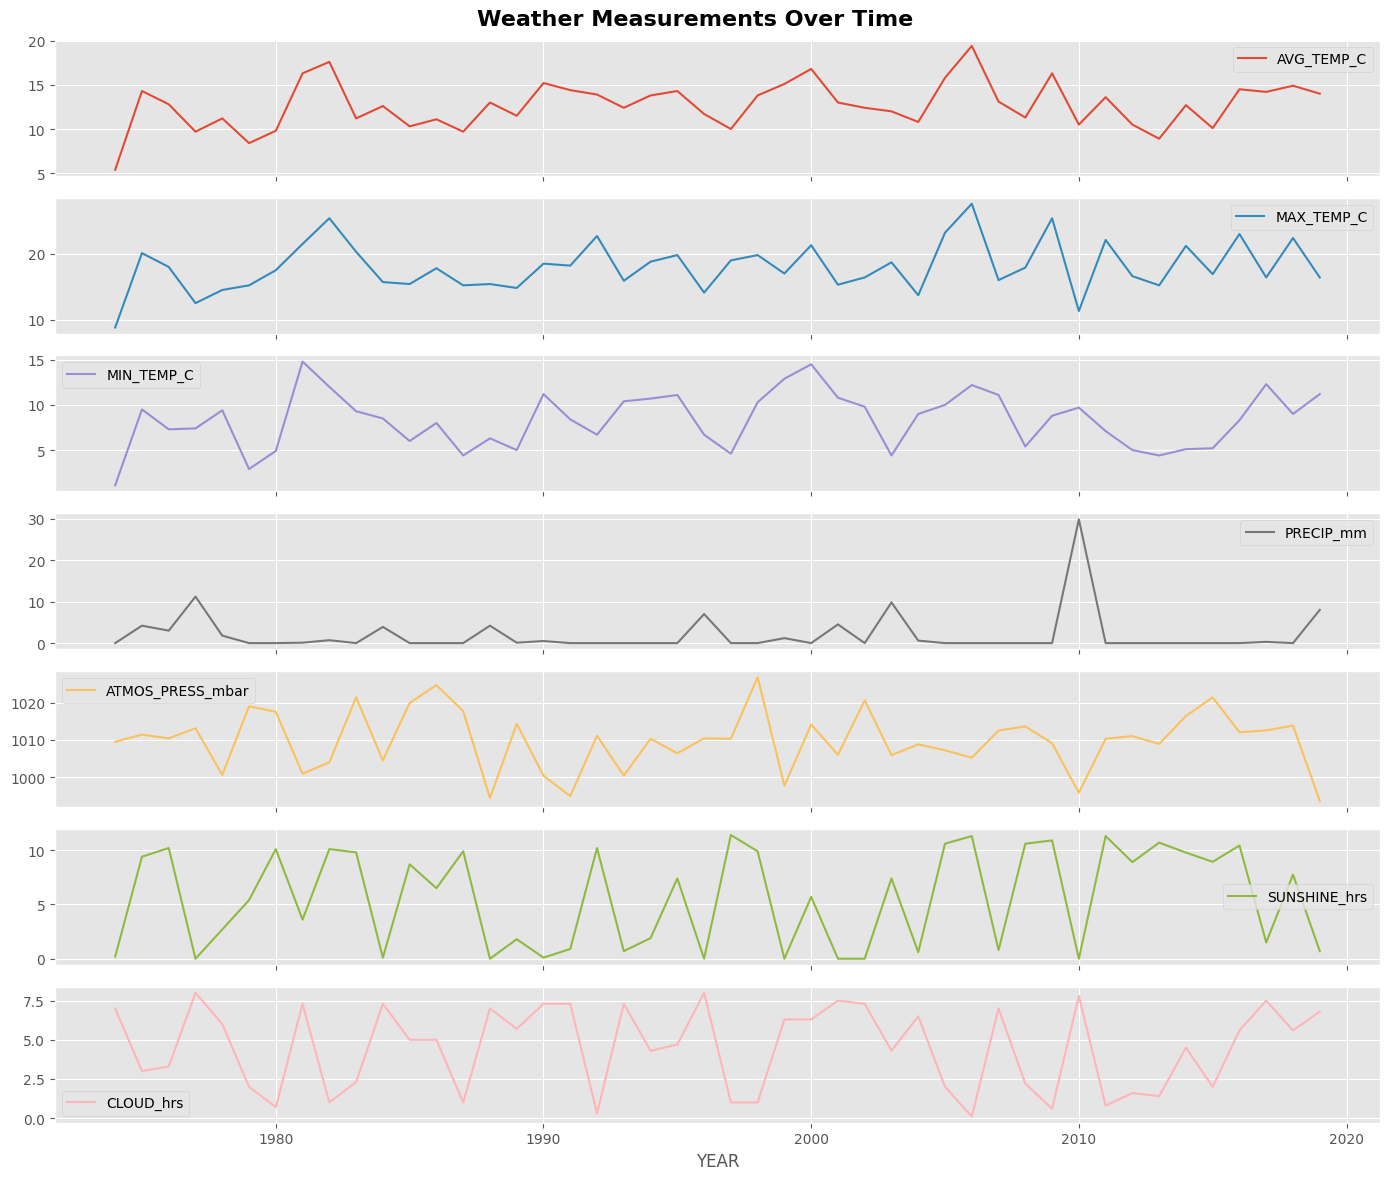

In [ ]:
# Time profile of weather variables
weather_df.set_index('YEAR').plot(figsize=(14,12), subplots=True);
plt.suptitle('Weather Measurements Over Time', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Analyzing the pairwise relationships of weather measurements over time using a pairplot can provide several insights into how different weather parameters are related to each other and how they vary over the years.
We see a strong positive correlation between average temperature, maximum temperature, and minimum temperature. There is a positive correlation between sunshine hours and temperature variables, as increased sunshine can lead to warmer temperatures.

By examining these relationships in the pairplot, we can gain a deeper understanding of how different weather parameters interact with each other and how they contribute to the overall weather conditions experienced during marathon events over time.

<Figure size 1400x1200 with 0 Axes>

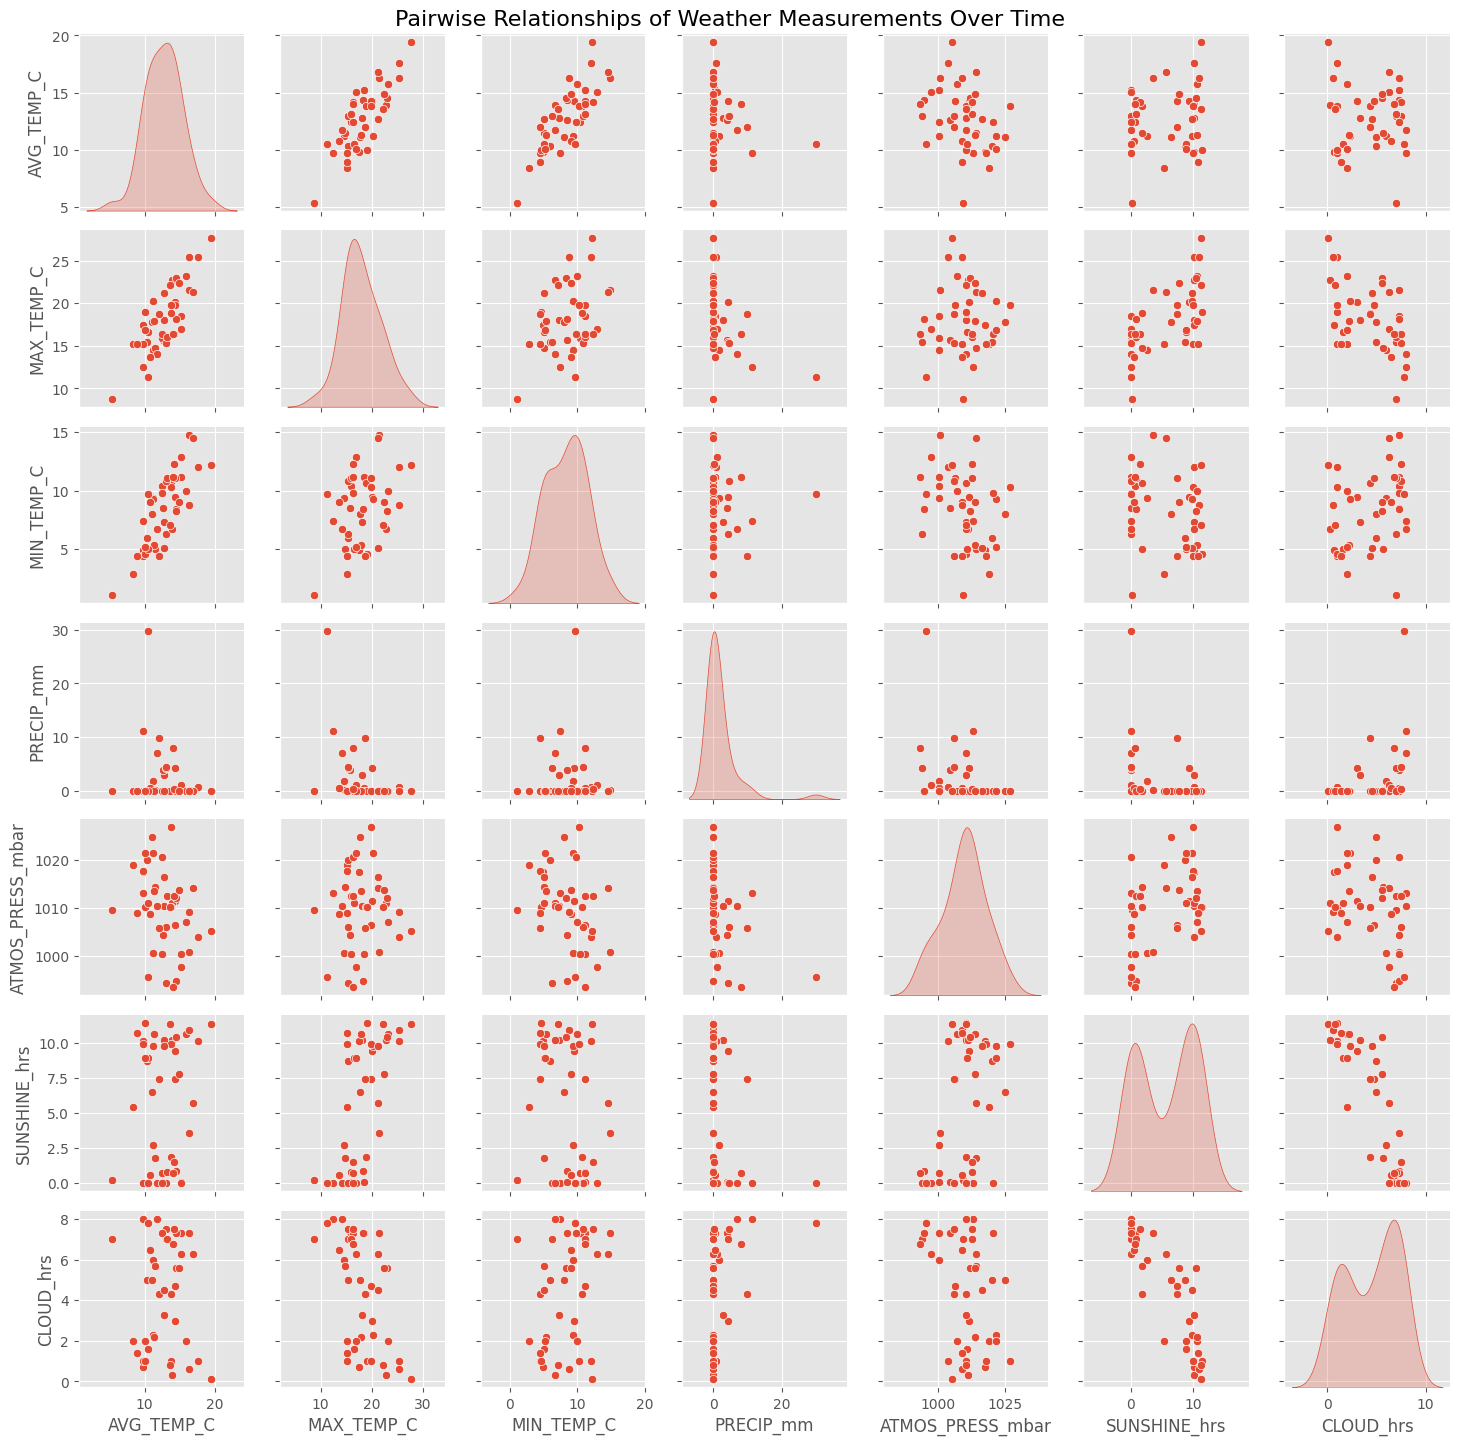

In [ ]:
# Correlation between weather variables
plt.figure(figsize=(14, 12))

pairplot = sns.pairplot(weather_df.set_index('YEAR'), diag_kind='kde', size=2.1, corner=False)

plt.suptitle('Pairwise Relationships of Weather Measurements Over Time', fontsize=16)
plt.tight_layout()
plt.show()

#Part 3: Merging Marathon and Weather Data, More EDA

### 3.1 Merging Marathon and Weather Data

Now that we have analyzed each dataset separately, we will join them on `YEAR` so that the combined data describes the weather conditions that each marathon runner was running in their respective race and year.

In [ ]:
# Merge and show processed marathon and weather data files
combined_df = pd.merge(left=marathon_df, right=weather_df, how='left', on='YEAR')
print("Number of rows: ", len(combined_df.count(axis=1)))
combined_df.sample(10)

Number of rows:  869474


,YEAR,GENDER,AGE,TIME,TIME_minutes,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C,PRECIP_mm,ATMOS_PRESS_mbar,SUNSHINE_hrs,CLOUD_hrs
260996,2001,female,35,04:06:05,246.08,13.0,15.3,10.8,4.5,1006.00,0.00,7.5
394711,2006,female,30,03:50:03,230.05,19.4,27.6,12.2,0.0,1005.20,11.30,0.1
737968,2016,male,35,03:58:20,238.33,14.5,23.0,8.3,0.0,1012.05,10.43,5.6
379521,2005,male,50,04:42:47,282.78,15.8,23.2,10.0,0.0,1007.20,10.60,2.0
279202,2002,male,70,03:39:11,219.18,12.4,16.4,9.8,0.0,1020.60,0.00,7.3
119736,1992,female,30,03:52:15,232.25,13.9,22.7,6.7,0.0,1011.10,10.20,0.3
259578,2001,male,35,03:59:56,239.93,13.0,15.3,10.8,4.5,1006.00,0.00,7.5
368352,2005,male,40,03:58:40,238.67,15.8,23.2,10.0,0.0,1007.20,10.60,2.0
815205,2018,male,30,04:02:45,242.75,14.9,22.4,9.0,0.0,1013.82,7.75,5.6
267811,2001,male,35,04:39:39,279.65,13.0,15.3,10.8,4.5,1006.00,0.00,7.5


### 3.2 Processing and One-Hot Encoding of Gender

We will drop our `TIME` column since we replaced it with the `TIME_minutes` which is of float type and will be easier to compute with.

Next, we will perform one-hot encoding. By encoding our categorical variable `GENDER` into a numerical format, we make the dataset compatible with a wider range of algorithms. One-hot encoding in particular preserves the categorical information without imposing any ordinal relationship between categories.

In [ ]:
# Drop TIME column
combined_df.drop(columns=['TIME'], inplace=True)

# One hot encoding GENDER column
encoded_df = pd.get_dummies(combined_df, columns=['GENDER'])
encoded_df.sample(5)

,YEAR,AGE,TIME_minutes,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C,PRECIP_mm,ATMOS_PRESS_mbar,SUNSHINE_hrs,CLOUD_hrs,GENDER_female,GENDER_male
602747,2012,30,239.08,10.5,16.6,5.0,0.0,1011.01,8.9,1.6,False,True
355059,2004,50,329.18,10.8,13.7,9.0,0.6,1008.80,0.6,6.5,True,False
369403,2005,35,242.23,15.8,23.2,10.0,0.0,1007.20,10.6,2.0,True,False
158225,1996,35,209.98,11.7,14.1,6.7,7.0,1010.40,0.0,8.0,True,False
774390,2017,30,236.58,14.2,16.4,12.3,0.3,1012.53,1.5,7.5,False,True


### 3.3 Visuals on Combined Data

Before we build our models, we want to see which variables have correlations between them. Specifically, we are interested in the features that are correlated with `TIME_minutes` since that is the variable we will be predicting in our models.

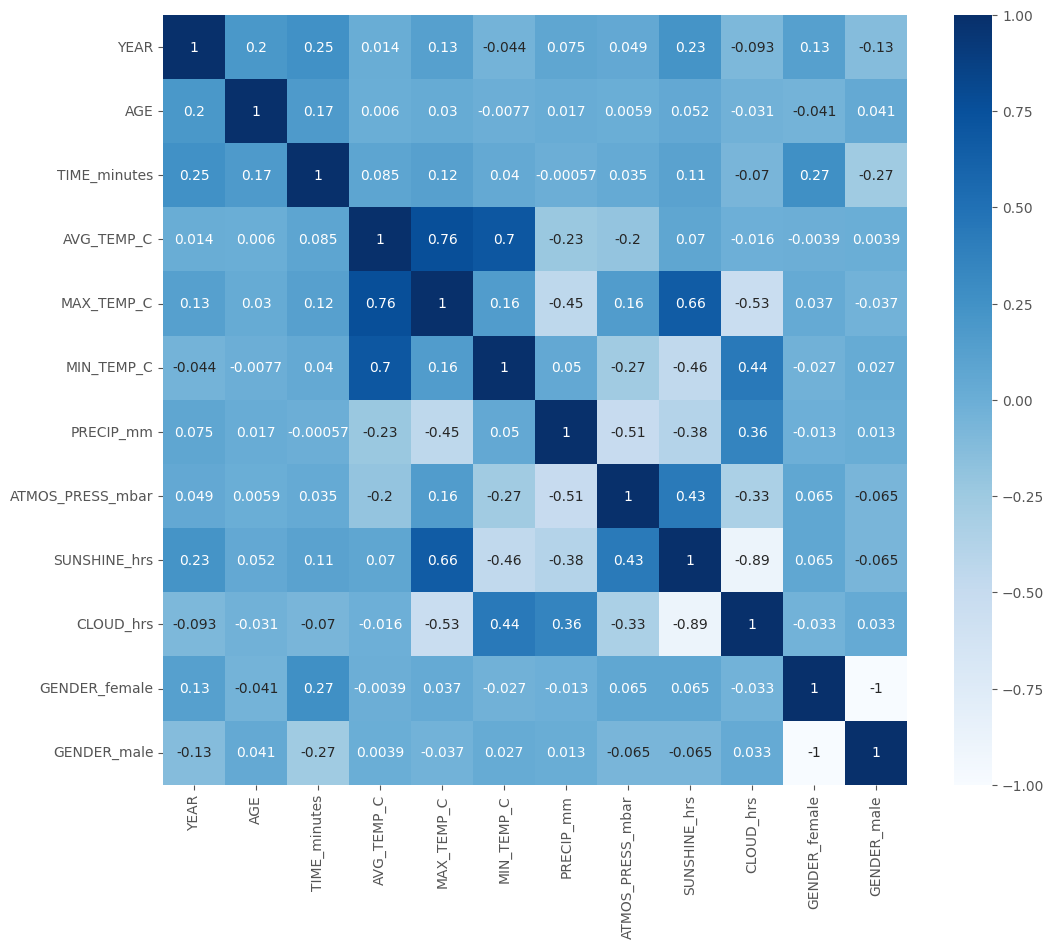

In [ ]:
# Analysis of correlation between weather variables and finishing time
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(encoded_df.corr(method='pearson'), annot=True, cmap='Blues');

We note some observations:

1. **Age and Finish Time**: The finish time displays a statistically weak positive correlation with the age group of r = 0.17 (seen in the earlier boxplot).

2. **Weather Variables**: We see weaker correlations between race finish times and weather variables in our sample. Specifically, there is a weak positive correlation with sunshine of r = 0.11 and max temperature of r = 0.12. The weather variables, however, have strong correlations among themselves which is as expected.

3. **Trends Over Time**: Year exhibits weak positive correlations with age (r = 0.2) and time (r = 0.25), indicating that over the years, more older participants have chosen to participate in Berlin marathons. Consequently, average finish times have increased over the years, while best times have decreased.

4. **Weather Trends**: Year shows weak correlations with max temperature of r = 0.13 and sunshine of r = 0.23, indicating weather conditions have become slightly warmer over the years.

These observations shed light on various factors influencing marathon performance, including age, weather conditions, and temporal trends. While some correlations are weak, they contribute to a nuanced understanding of the dynamics at play in marathon running events like the Berlin marathon.

#### Average Finish Time by Age Group, Gender, and Different Weather Variables

We separate the data into male and female runners, then we select the columns for age, finish time in minutes and one of three weather variables: average temperature, precipitation, or atmospheric pressure. We then group by age and the weather varable so that we can observe the relationship between finishing times and age and weather.

In [ ]:
male_encoded_df = encoded_df[encoded_df['GENDER_male'] == 1]
female_encoded_df = encoded_df[encoded_df['GENDER_female'] == 1]

# Grouping data by gender, age, and avg temperature range
grouped_male_temp = male_encoded_df[['AGE', 'TIME_minutes', 'AVG_TEMP_C']].groupby(by=['AGE', 'AVG_TEMP_C']).mean().reset_index()
grouped_female_temp = female_encoded_df[['AGE', 'TIME_minutes', 'AVG_TEMP_C']].groupby(by=['AGE', 'AVG_TEMP_C']).mean().reset_index()

# Grouping data by gender, age, and precipitation
grouped_male_precip = male_encoded_df[['AGE', 'TIME_minutes', 'PRECIP_mm']].groupby(by=['AGE', 'PRECIP_mm']).mean().reset_index()
grouped_female_precip = female_encoded_df[['AGE', 'TIME_minutes', 'PRECIP_mm']].groupby(by=['AGE', 'PRECIP_mm']).mean().reset_index()

# Grouping data by gender, age, and atmospheric pressure
grouped_male_atm = male_encoded_df[['AGE', 'TIME_minutes', 'ATMOS_PRESS_mbar']].groupby(by=['AGE', 'ATMOS_PRESS_mbar']).mean().reset_index()
grouped_female_atm = female_encoded_df[['AGE', 'TIME_minutes', 'ATMOS_PRESS_mbar']].groupby(by=['AGE', 'ATMOS_PRESS_mbar']).mean().reset_index()

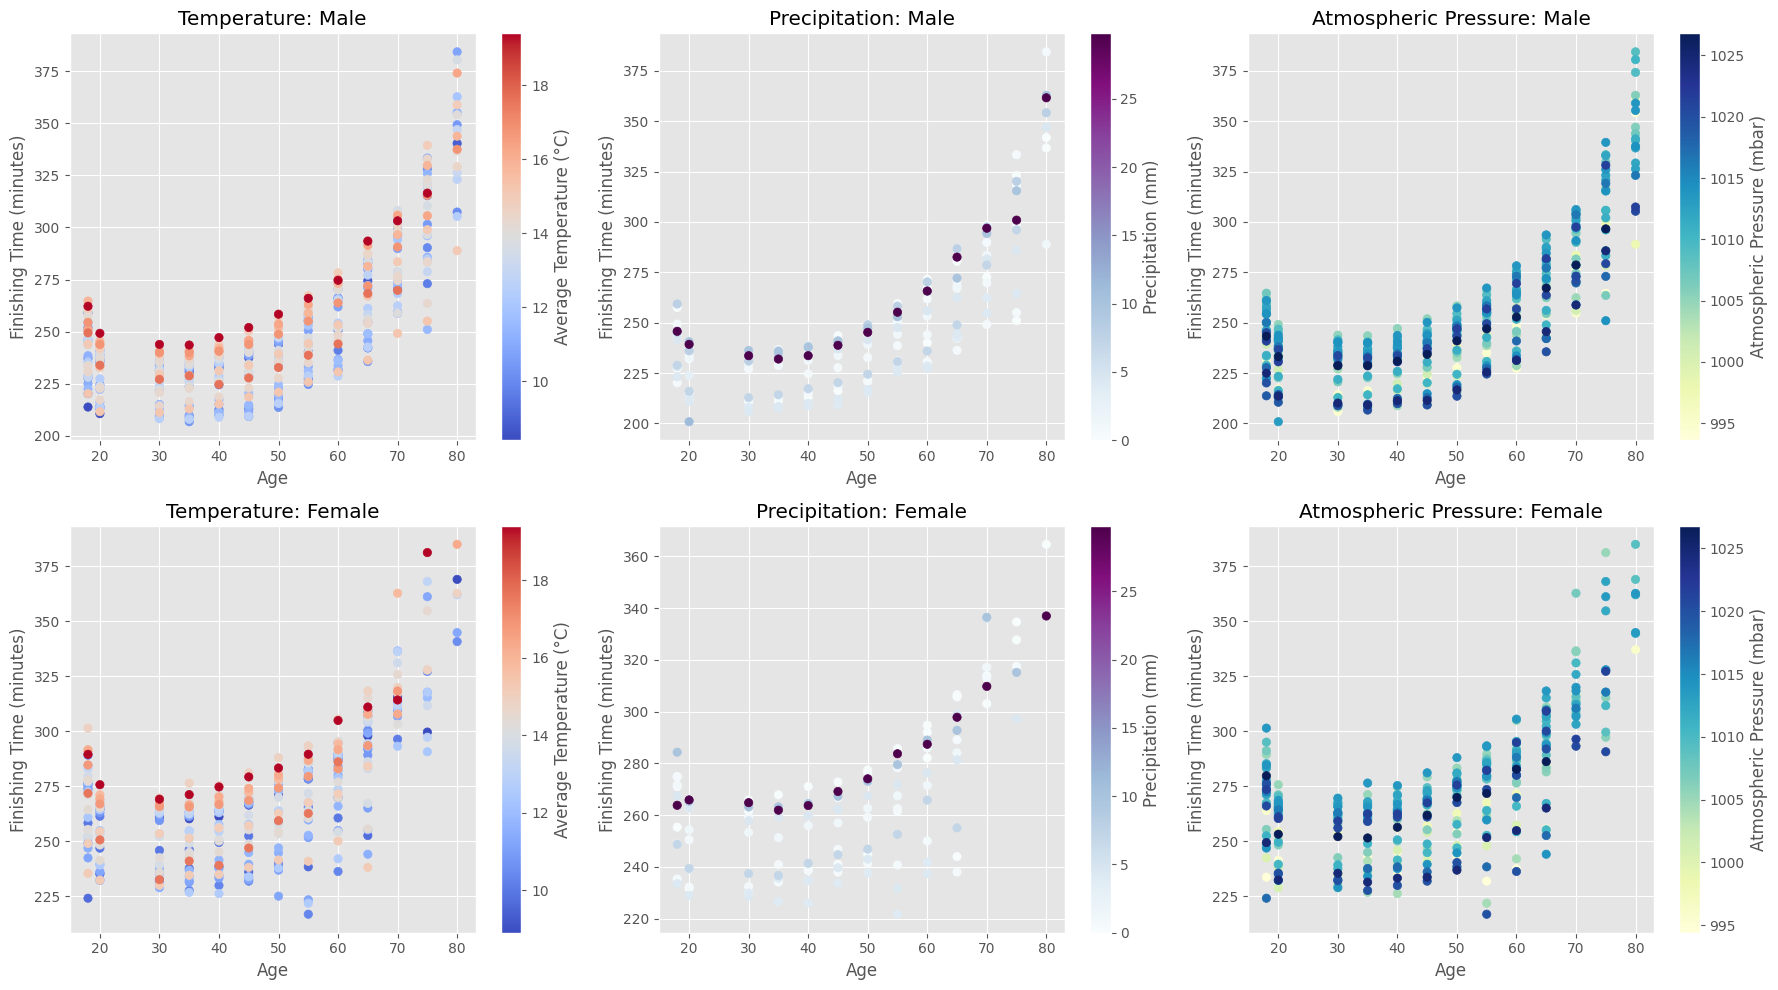

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plotting for males - Temperature
sc1 = axs[0, 0].scatter(grouped_male_temp['AGE'], grouped_male_temp['TIME_minutes'], c=grouped_male_temp['AVG_TEMP_C'], cmap='coolwarm', label='Male')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Finishing Time (minutes)')
axs[0, 0].set_title('Temperature: Male')
fig.colorbar(sc1, ax=axs[0, 0], label='Average Temperature (°C)')

# Plotting for females - Temperature
sc2 = axs[1, 0].scatter(grouped_female_temp['AGE'], grouped_female_temp['TIME_minutes'], c=grouped_female_temp['AVG_TEMP_C'], cmap='coolwarm', label='Female')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Finishing Time (minutes)')
axs[1, 0].set_title('Temperature: Female')
fig.colorbar(sc2, ax=axs[1, 0], label='Average Temperature (°C)')

# Plotting for males - Precipitation
sc3 = axs[0, 1].scatter(grouped_male_precip['AGE'], grouped_male_precip['TIME_minutes'], c=grouped_male_precip['PRECIP_mm'], cmap='BuPu', label='Male')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Finishing Time (minutes)')
axs[0, 1].set_title('Precipitation: Male')
fig.colorbar(sc3, ax=axs[0, 1], label='Precipitation (mm)')

# Plotting for females - Precipitation
sc4 = axs[1, 1].scatter(grouped_female_precip['AGE'], grouped_female_precip['TIME_minutes'], c=grouped_female_precip['PRECIP_mm'], cmap='BuPu', label='Female')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Finishing Time (minutes)')
axs[1, 1].set_title('Precipitation: Female')
fig.colorbar(sc4, ax=axs[1, 1], label='Precipitation (mm)')

# Plotting for males - Atmospheric Pressure
sc5 = axs[0, 2].scatter(grouped_male_atm['AGE'], grouped_male_atm['TIME_minutes'], c=grouped_male_atm['ATMOS_PRESS_mbar'], cmap='YlGnBu', label='Male')
axs[0, 2].set_xlabel('Age')
axs[0, 2].set_ylabel('Finishing Time (minutes)')
axs[0, 2].set_title('Atmospheric Pressure: Male')
fig.colorbar(sc5, ax=axs[0, 2], label='Atmospheric Pressure (mbar)')

# Plotting for females - Atmospheric Pressure
sc6 = axs[1, 2].scatter(grouped_female_atm['AGE'], grouped_female_atm['TIME_minutes'], c=grouped_female_atm['ATMOS_PRESS_mbar'], cmap='YlGnBu', label='Female')
axs[1, 2].set_xlabel('Age')
axs[1, 2].set_ylabel('Finishing Time (minutes)')
axs[1, 2].set_title('Atmospheric Pressure: Female')
fig.colorbar(sc6, ax=axs[1, 2], label='Atmospheric Pressure (mbar)')

plt.tight_layout()
plt.show()

In terms of temperatures, it appears that there may be some clustering or patterns in finish times based on different temperature ranges, the warmer temperatures seem to yield slower times. The scatter plots for males and females show similar overall trends.

In terms of precipitation, the heavy rain days appear to yield slower times. Otherwise, light rain and no rain do not have a clear correlation. The scatter plots for males and females show similar overall trends.

We observe a that lower atmospheric pressure seems to yield faster times. But higher atmospheric pressure does not seem to influence times as much.

Overall, we get insights into the relationships between age, finish time, and average temperature, and can serve as a basis for further analysis and exploration of the dataset.

#Part 4: Baseline Model for Time Prediction Based on Weather

In [ ]:
encoded_df.sample(10)

,YEAR,AGE,TIME_minutes,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C,PRECIP_mm,ATMOS_PRESS_mbar,SUNSHINE_hrs,CLOUD_hrs,GENDER_female,GENDER_male
155336,1996,40,193.30,11.7,14.1,6.7,7.0,1010.4,0.00,8.0,False,True
404812,2006,30,267.30,19.4,27.6,12.2,0.0,1005.2,11.30,0.1,True,False
423443,2007,50,215.12,13.1,16.0,11.1,0.0,1012.5,0.80,7.0,False,True
707865,2015,20,252.90,10.1,16.9,5.2,0.0,1021.4,8.93,2.0,False,True
437607,2007,40,260.07,13.1,16.0,11.1,0.0,1012.5,0.80,7.0,False,True
4422,1982,20,223.48,17.6,25.4,12.0,0.7,1004.0,10.10,1.0,False,True
74680,1989,40,233.00,11.5,14.8,5.0,0.1,1014.3,1.80,5.7,False,True
130241,1993,40,208.93,12.4,15.9,10.4,0.0,1000.4,0.70,7.3,False,True
626227,2013,30,204.68,8.9,15.2,4.4,0.0,1008.9,10.70,1.4,False,True
310733,2003,40,237.35,12.0,18.7,4.4,9.8,1005.9,7.40,4.3,False,True


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separate numerical and categorical columns
numerical_cols = ['YEAR', 'AGE', 'TIME_minutes', 'AVG_TEMP_C', 'MAX_TEMP_C', 'MIN_TEMP_C', 'PRECIP_mm', 'ATMOS_PRESS_mbar', 'SUNSHINE_hrs', 'CLOUD_hrs']
categorical_cols = ['GENDER_female', 'GENDER_male']

# Scale numerical columns
scaler = StandardScaler()
scaled_df = encoded_df
scaled_df[numerical_cols] = scaler.fit_transform(encoded_df[numerical_cols])

# Resulting DataFrame
scaled_df.sample(5)

,YEAR,AGE,TIME_minutes,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C,PRECIP_mm,ATMOS_PRESS_mbar,SUNSHINE_hrs,CLOUD_hrs,GENDER_female,GENDER_male
73457,-1.69,-1.68,-0.40,-0.67,-0.99,-1.24,-0.35,0.60,-0.94,0.48,False,True
699765,0.99,-0.32,-0.29,-1.26,-0.44,-1.17,-0.36,1.51,0.62,-0.90,True,False
209920,-0.66,0.59,-0.56,0.84,-0.41,1.55,-0.17,-1.55,-1.33,0.70,False,True
126416,-1.27,-0.77,-1.51,-0.29,-0.70,0.67,-0.36,-1.20,-1.18,1.07,False,True
656026,0.78,-1.68,2.14,-1.76,-0.89,-1.45,-0.36,-0.10,1.01,-1.12,True,False


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Select relevant features and target
features = ['AVG_TEMP_C', 'MAX_TEMP_C', 'MIN_TEMP_C', 'PRECIP_mm', 'ATMOS_PRESS_mbar', 'SUNSHINE_hrs', 'CLOUD_hrs']
target = 'TIME_minutes'

# Handle missing values if any
combined_df = combined_df.dropna(subset=features + [target])

# Baseline model with linear regression
X_train, X_test, y_train, y_test = train_test_split(combined_df[features], combined_df[target], test_size=0.2, random_state=0)

# Calculate the mean of y_train
mean_y_train = y_train.mean()

# Create an array of predicted values with the mean
y_pred_baseline = [mean_y_train] * len(y_test)

# Now you can evaluate the performance of this baseline model
print('Mean Absolute Error (Baseline):', metrics.mean_absolute_error(y_test, y_pred_baseline))


Mean Absolute Error (Baseline): 33.600254648987494


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select relevant features and target
features = ['AVG_TEMP_C', 'MAX_TEMP_C', 'MIN_TEMP_C', 'PRECIP_mm', 'ATMOS_PRESS_mbar', 'SUNSHINE_hrs', 'CLOUD_hrs']
target = 'TIME_minutes'

# Handle missing values if any
scaled_df = scaled_df.dropna(subset=features + [target])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df[features], scaled_df[target], test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.9749346008757449


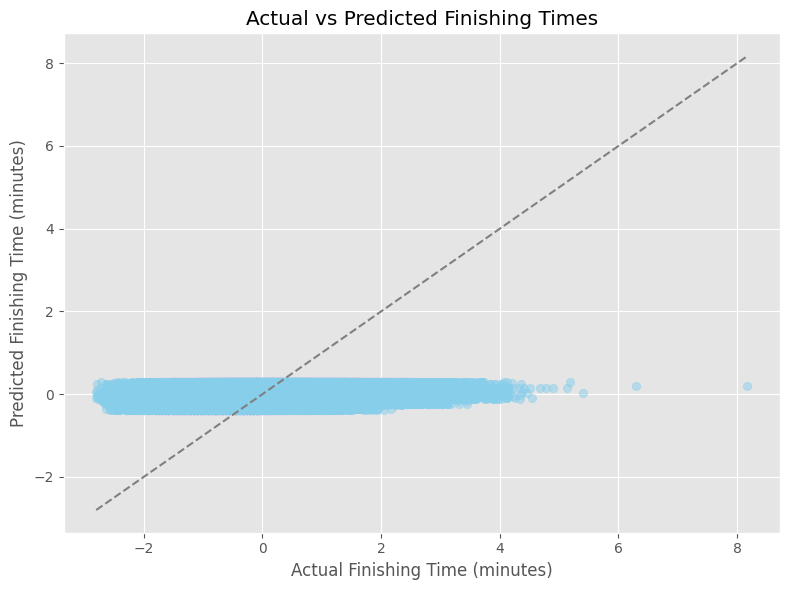

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='gray', linestyle='--')
plt.title('Actual vs Predicted Finishing Times')
plt.xlabel('Actual Finishing Time (minutes)')
plt.ylabel('Predicted Finishing Time (minutes)')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

Evaluate Linear regression model


In [ ]:
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_train, model.predict(X_train))
mse = mean_squared_error(y_train, model.predict(X_train))
rmse = np.sqrt(mse)
r2 = r2_score(y_train, model.predict(X_train))

In [ ]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", mae)
print("R-squaredL", r2)

Mean Absolute Error: 0.7788963303643005
Mean Squared Error: 0.9724233474556675
Root Mean Squared Error: 0.7788963303643005
R-squaredL 0.027081187509105598


### Target Imbalance on Gender

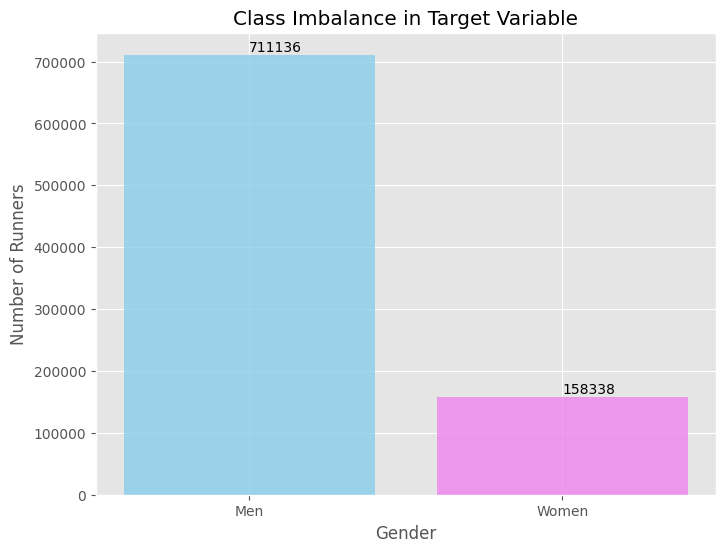

In [ ]:
# TODO: Plot target variable

# Count the number of observations for each decade
count = combined_df['GENDER'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(count.index, count.values, color=['skyblue', 'violet'], alpha=0.8)

# Adding labels and title
plt.title('Class Imbalance in Target Variable')
plt.xlabel('Gender')
plt.ylabel('Number of Runners')

# Adding text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

# Customizing x-axis ticks
plt.xticks(count.index, ['Men', 'Women'])

# Displaying the plot
plt.show()

**Baseline, plotting max_temp_c vs time**


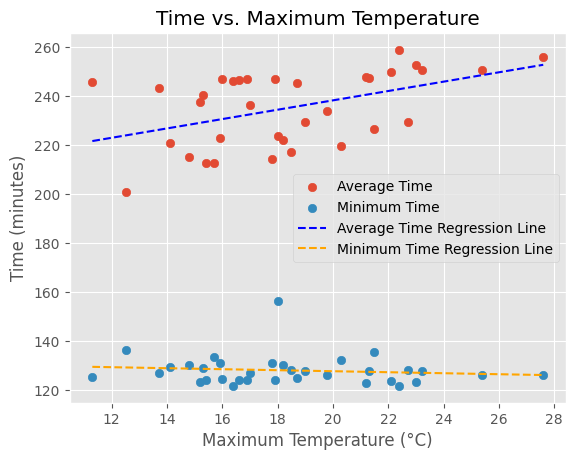

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Group by 'MAX_TEMP_C' and calculate average and minimum time for each temperature
temperature_stats = combined_df.groupby('MAX_TEMP_C')['TIME_minutes'].agg(['mean', 'min']).reset_index()

# Plot MAX_TEMP_C vs the average time
plt.scatter(temperature_stats['MAX_TEMP_C'], temperature_stats['mean'], marker='o', label='Average Time')

# Plot MAX_TEMP_C vs the minimum time
plt.scatter(temperature_stats['MAX_TEMP_C'], temperature_stats['min'], marker='o', label='Minimum Time')

# Fit a linear regression line to the average time data
X = temperature_stats['MAX_TEMP_C'].values.reshape(-1, 1)  # Reshape to a 2D array
y_mean = temperature_stats['mean'].values
regression_model_avg = LinearRegression().fit(X, y_mean)
plt.plot(temperature_stats['MAX_TEMP_C'], regression_model_avg.predict(X), color='blue', linestyle='--', label='Average Time Regression Line')

# Fit a linear regression line to the minimum time data
y_min = temperature_stats['min'].values
regression_model_min = LinearRegression().fit(X, y_min)
plt.plot(temperature_stats['MAX_TEMP_C'], regression_model_min.predict(X), color='orange', linestyle='--', label='Minimum Time Regression Line')

# Add labels and title
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Time (minutes)')
plt.title('Time vs. Maximum Temperature')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()



In [ ]:

# Calculate the R^2 score for the minimum time regression line
r_squared_min = regression_model_min.score(X, y_min)
print("R^2 value for Minimum Time Regression Line:", r_squared_min)
# Calculate the R^2 score for the average time regression line
r_squared_avg = regression_model_avg.score(X, y_mean)
print("R^2 value for Average Time Regression Line:", r_squared_avg)

R^2 value for Minimum Time Regression Line: 0.01506044723902411
R^2 value for Average Time Regression Line: 0.21704560414628804


#Part 5: Linear Regression Model



Here we apply a linear regression model to the data after having been cleaned. We also apply feature engineering where we use label encoding to turn categorical data into numerical data. Based off of the baseline model, its natural for us to assume that the relationship is linear. We also try to use PCA and scaling to improve our R^2 score.


In [ ]:
# Temperature bins and ranges
temp_bin_edges = [0,8,15,30]
temp_bin_labels = ['0-8','8-15','15-30']

# Pressure bins and ranges
press_bin_edges = [900,1013,1030]
press_bin_labels = ['900-1013','1013-1030']

# Precipitation bins and ranges
precip_bin_edges = [0,10,20,50]
precip_bin_labels = ['0-10','10-20','20-50']

# Create categorical variable for weather conditions
range_df = combined_df
range_df['MAX TEMP RANGE'] = pd.cut(x=range_df['MAX_TEMP_C'], bins=temp_bin_edges, labels=temp_bin_labels, include_lowest=True)
range_df['ATMOS PRESS RANGE'] = pd.cut(x=range_df['ATMOS_PRESS_mbar'], bins=press_bin_edges, labels=press_bin_labels, include_lowest=True)
range_df['PRECIPITATION RANGE'] = pd.cut(x=range_df['PRECIP_mm'], bins=precip_bin_edges, labels=precip_bin_labels, include_lowest=True)


X_train,X_test,y_train,y_test = train_test_split(range_df.drop(['TIME_minutes'],axis=1),range_df['TIME_minutes'],test_size=0.20,random_state=42)

In [ ]:
X_train.head()
print(X_train['MAX TEMP RANGE'].nunique())
print(X_train['ATMOS PRESS RANGE'].nunique())
print(X_train['PRECIPITATION RANGE'].nunique())

2
2
3


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encoder = LabelEncoder()

X_train['GENDER'] = encoder.fit_transform(X_train['GENDER'])
X_test['GENDER'] = encoder.fit_transform(X_test['GENDER'])
X_train['MAX TEMP RANGE'] = encoder.fit_transform(X_train['MAX TEMP RANGE'])
X_test['MAX TEMP RANGE'] = encoder.fit_transform(X_test['MAX TEMP RANGE'])
X_train['ATMOS PRESS RANGE'] = encoder.fit_transform(X_train['ATMOS PRESS RANGE'])
X_test['ATMOS PRESS RANGE'] = encoder.fit_transform(X_test['ATMOS PRESS RANGE'])
X_train['PRECIPITATION RANGE'] = encoder.fit_transform(X_train['PRECIPITATION RANGE'])
X_test['PRECIPITATION RANGE'] = encoder.fit_transform(X_test['PRECIPITATION RANGE'])

In [ ]:
X_train.head()

,YEAR,GENDER,AGE,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C,PRECIP_mm,ATMOS_PRESS_mbar,SUNSHINE_hrs,CLOUD_hrs,MAX TEMP RANGE,ATMOS PRESS RANGE,PRECIPITATION RANGE
527637,2010,1,50,10.5,11.3,9.7,29.8,995.80,0.00,7.8,1,1,2
450505,2008,1,30,11.3,17.9,5.4,0.0,1013.60,10.60,2.2,0,0,0
838080,2018,1,35,14.9,22.4,9.0,0.0,1013.82,7.75,5.6,0,0,0
586082,2011,0,50,13.6,22.1,7.1,0.0,1010.30,11.30,0.8,0,1,0
124241,1992,1,60,13.9,22.7,6.7,0.0,1011.10,10.20,0.3,0,1,0


### Linear Regression with PCA

In [ ]:
# TO-DO: Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TO-DO: Instantiate and Fit PCA
pca = PCA()
X2 = pca.fit(X_train_scaled)

In [ ]:
# TO-DO: Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_

# TO-DO: Save the CUMULATIVE explained variance ratios into variable called "cum_evr"

## tutorial cumulative sum used: https://www.digitalocean.com/community/tutorials/numpy-cumsum-in-python
cum_evr = np.cumsum(explained_variance_ratios)

Text(0.5, 1.0, 'Cumulative Explained Variance vs. Number of PCA Components')

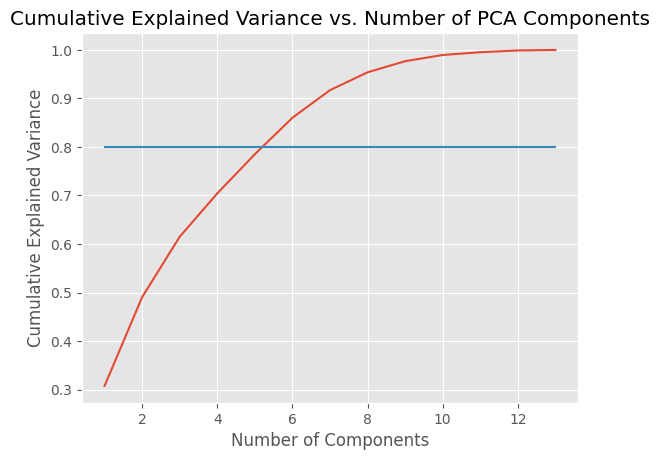

In [ ]:
# TO-DO: find optimal num components to use (n) by plotting explained variance ratio

x_ticks = np.arange(len(cum_evr)) + 1

plt.plot(size = [8, 6])
sns.lineplot(x = x_ticks, y = cum_evr)
sns.lineplot(x = x_ticks, y = 0.8 * np.ones(len(cum_evr)))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of PCA Components')

We observe that 5 components are appropriate for this problem


In [ ]:
# 1. Refit and transform on training with parameter n (as deduced from the last step)
n = 5
pca = PCA(n_components = n)
X_train_pca = pca.fit_transform(X_train_scaled)

# 2. Transform on Testing Set and store it as `X_test_pca`
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
l_reg = LinearRegression()
l_reg.fit(X_train_pca,y_train)

LinearRegression()

In [ ]:
l_reg.predict(X_test_pca).shape

(173895,)

In [ ]:
l_reg.score(X_test_pca,y_test)
# Calculate R^2 for the test set
test_set_r_squared = l_reg.score(X_test_pca, y_test)
print("Test Set R^2 value:", test_set_r_squared)

# Calculate MSE for the test set
y_pred_test = l_reg.predict(X_test_pca)
test_set_mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", test_set_mse)

Test Set R^2 value: 0.12361700792875763
Mean Squared Error: 1588.8504465876952


We see that applying PCA does not yield a high r^2 value. So we also try a Linear Regression Model without PCA since it may not be necessary to select features since the number of columns we have are not singificantly greater than how many rows we have.

In [ ]:
l_reg = LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
l_reg.predict(X_test).shape

(173895,)

In [ ]:
l_reg.score(X_test,y_test)
# Calculate R^2 for the test set
test_set_r_squared = l_reg.score(X_test, y_test)
print("Test Set R^2 value:", test_set_r_squared)
train_set_r_squared = l_reg.score(X_train, y_train)
print("Train Set R^2 value:", train_set_r_squared)
# Calculate MSE for the test set
y_pred_test = l_reg.predict(X_test)
test_set_mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", test_set_mse)

Test Set R^2 value: 0.15038478213712514
Train Set R^2 value: 0.1499445477797906
Mean Squared Error: 1540.3214468354201


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the hyperparameters and their values
param_grid = {
    'fit_intercept': [True, False],
}

# Create an instance of the LinearRegression model
model = LinearRegression()

# Create GridSearchCV instance
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train your final model
best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the final model
test_set_r_squared = best_model.score(X_test, y_test)
print("Test Set R^2 value:", test_set_r_squared)


Best Hyperparameters: {'fit_intercept': True}
Test Set R^2 value: 0.15038478213712514


We can see from the r^2 value that pca is not helpful in making our model more accurate
One reason the r^2 value is so low is that the model is trying to predict the individuals time instead of the average running time since so many individuals are under the same conditions per race. Since the baseline model was quite linear for predicting the average race time, we can try to predict the average race time instead.

In [ ]:
# Create categorical variable for weather conditions
range_avg_df = combined_df
range_avg_df['MAX TEMP RANGE'] = pd.cut(x=range_df['MAX_TEMP_C'], bins=temp_bin_edges, labels=temp_bin_labels, include_lowest=True)
range_avg_df['ATMOS PRESS RANGE'] = pd.cut(x=range_df['ATMOS_PRESS_mbar'], bins=press_bin_edges, labels=press_bin_labels, include_lowest=True)
range_avg_df['PRECIPITATION RANGE'] = pd.cut(x=range_df['PRECIP_mm'], bins=precip_bin_edges, labels=precip_bin_labels, include_lowest=True)

# Group by 'TIME' (assuming 'TIME' is the column containing the race time) and calculate the average race time per day
range_avg_df['TIME_minutes_average'] = range_avg_df.groupby(['YEAR', 'AGE', 'GENDER'])['TIME_minutes'].transform('mean')
range_avg_df = range_avg_df.drop(['TIME_minutes'], axis=1)
range_avg_df = range_avg_df.drop_duplicates()


X_train_avg,X_test_avg,y_train_avg,y_test_avg = train_test_split(range_avg_df.drop(['TIME_minutes_average'],axis=1),range_avg_df['TIME_minutes_average'],test_size=0.20,random_state=42)


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encoder = LabelEncoder()

X_train_avg['GENDER'] = encoder.fit_transform(X_train_avg['GENDER'])
X_test_avg['GENDER'] = encoder.fit_transform(X_test_avg['GENDER'])
X_train_avg['MAX TEMP RANGE'] = encoder.fit_transform(X_train_avg['MAX TEMP RANGE'])
X_test_avg['MAX TEMP RANGE'] = encoder.fit_transform(X_test_avg['MAX TEMP RANGE'])
X_train_avg['ATMOS PRESS RANGE'] = encoder.fit_transform(X_train_avg['ATMOS PRESS RANGE'])
X_test_avg['ATMOS PRESS RANGE'] = encoder.fit_transform(X_test_avg['ATMOS PRESS RANGE'])
X_train_avg['PRECIPITATION RANGE'] = encoder.fit_transform(X_train_avg['PRECIPITATION RANGE'])
X_test_avg['PRECIPITATION RANGE'] = encoder.fit_transform(X_test_avg['PRECIPITATION RANGE'])

In [ ]:
l_reg_avg = LinearRegression()
l_reg_avg.fit(X_train_avg,y_train_avg)

LinearRegression()

In [ ]:
l_reg_avg.predict(X_test_avg).shape

(176,)

In [ ]:
l_reg_avg.score(X_test_avg,y_test_avg)
# Calculate R^2 for the test set
test_set_r_squared_avg = l_reg_avg.score(X_test_avg, y_test_avg)
print("Test Set R^2 value:", test_set_r_squared_avg)

# Calculate MSE for the test set
y_pred_test_avg = l_reg_avg.predict(X_test_avg)
test_set_mse_avg = mean_squared_error(y_test_avg, y_pred_test_avg)
print("Mean Squared Error:", test_set_mse_avg)

Test Set R^2 value: 0.7042158149364417
Mean Squared Error: 375.4671855457043


In [ ]:

num_rows = range_avg_df.shape[0]
print("Number of rows:", num_rows)



Number of rows: 878


We observe that it is easier to predict the average marathon time for runners of unique age, gender and year they ran, where the year they ran has differing weather data. This is because past the gender and age, the runners do not differentate and predicting their time based off of only weather is diffiuclt since training probably has a greater impact. Our R^2 value improved greatly after simplifying the data set by predicting the averages of runners by age, gender, and year. We were able to improve the R^2 value from 0.15 to 0.70.


#Part 5.1: Gradient Boosting Regression




We saw that for our linear regression model of individual runner times, our model was underfitting the data. In order to combat this, we can use graident boosting regression to capture a more complex relationship between the features and the target variable.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fitting GBR
gbr.fit(X_train_avg, y_train_avg)

# Calculating the predicted values
y_pred_gbr_test_avg = gbr.predict(X_test_avg)
y_pred_gbr_train_avg = gbr.predict(X_train_avg)

# Evaluate the model
r2_train_avg = r2_score(y_train_avg, y_pred_gbr_train_avg)
r2_test_avg = r2_score(y_test_avg, y_pred_gbr_test_avg)
mse_avg = mean_squared_error(y_test_avg, y_pred_gbr_test_avg)

print('Test Set R^2 value: ' + str(r2_train_avg))
print('Training Set R^2 value: ' + str(r2_test_avg))
print('Mean Squared Error: ' + str(mse_avg))

Test Set R^2 value: 0.962842665872019
Training Set R^2 value: 0.9506508108717309
Mean Squared Error: 62.643650629841325


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.15],
    'max_depth': [2, 3, 4]
}

# Instantiate the GBR model
gbr = GradientBoostingRegressor(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='r2')

# Fit GridSearchCV to training data
grid_search.fit(X_train_avg, y_train_avg)

# Access the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Access the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
r2_train = best_model.score(X_train_avg, y_train_avg)
r2_test = best_model.score(X_test_avg, y_test_avg)
mse = mean_squared_error(y_test_avg, best_model.predict(X_test_avg))

print('Training Set R^2 value:', r2_train)
print('Test Set R^2 value:', r2_test)
print('Mean Squared Error:', mse)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Training Set R^2 value: 0.9429314384409695
Test Set R^2 value: 0.9479076612949994
Mean Squared Error: 66.12579302661939


Even after doing grid search for the hyperparameter tuning, the results remain practically the same.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fitting GBR
gbr.fit(X_train, y_train)

# Calculating the predicted values
y_pred_gbr_test = gbr.predict(X_test)
y_pred_gbr_train = gbr.predict(X_train)

# Evaluate the model
r2_train = r2_score(y_train, y_pred_gbr_train)
r2_test = r2_score(y_test, y_pred_gbr_test)
mse = mean_squared_error(y_test, y_pred_gbr_test)

print('Test Set R^2 value: ' + str(r2_train))
print('Training Set R^2 value: ' + str(r2_test))
print('Mean Squared Error: ' + str(mse))

Test Set R^2 value: 0.18052061836244881
Training Set R^2 value: 0.18077051093514518
Mean Squared Error: 1485.2332271787088


Based off of the conlcusions from the linear regression model, we also did a gradient boosted regression model on the individual and average running times. We were able to get an R^2 value of 0.96 for the average time and 0.18 for the individual time. This is likely for the same reasons as the linear regression model such that weather affects runners at a whole. Ignoring outside variables, runners themselves already have a large range of performance based off of variables like diet, training, and equipment that our dataset does not contain. Therefore, we are able to better predict the average running time than the individual running time.

#Part 6: Random Forest Model





###6.1 Connecting to Spark

We set up the environment by installing necessary dependencies and configuring Apache Spark. It installs required system libraries and Python packages using `!apt` and `!pip` commands. Additionally, it initializes a SparkSession, which is essential for interacting with Spark.

In [ ]:
%%capture

!apt install libkrb5-dev
!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

In [ ]:
import pyspark
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

spark = SparkSession.builder.appName('final-project').getOrCreate()
sqlContext = SQLContext(spark)

%load_ext sparkmagic.magics

The sparkmagic.magics extension is already loaded. To reload it, use:
  %reload_ext sparkmagic.magics


###6.2 Random Forest Regression Modeling and Evaluation

Next, the data is prepared for modeling. We select the relevant columns from the dataset and creates a Spark DataFrame. Then, we import necessary libraries for feature engineering and model building, including VectorAssembler for assembling feature vectors and RandomForestRegressor for regression modeling. Finally, we construct a Pipeline to streamline the data processing and modeling workflow.

In [ ]:
spark_df = encoded_df[['YEAR', 'AGE', 'TIME_minutes', 'GENDER_female', 'GENDER_male', 'MAX_TEMP_C', 'PRECIP_mm', 'ATMOS_PRESS_mbar', 'SUNSHINE_hrs', 'CLOUD_hrs']]
spark_sdf = spark.createDataFrame(spark_df)

In [ ]:
from pyspark.ml.feature import VectorAssembler
feature_list = ['YEAR', 'AGE', 'GENDER_female', 'GENDER_male', 'MAX_TEMP_C', 'PRECIP_mm', 'ATMOS_PRESS_mbar', 'SUNSHINE_hrs', 'CLOUD_hrs']
assembler = VectorAssembler(inputCols=feature_list, outputCol="features")

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(labelCol="TIME_minutes", featuresCol="features")

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[assembler, rf])

This section involves model training and evaluation. We split the data into training and testing sets using an 80-20 ratio. Then, we train a RandomForestRegressor model using the training data. After training, the model's performance is evaluated on the test data using regression metrics such as Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Coefficient of Determination (R-squared).

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
train_data, test_data = spark_sdf.randomSplit([0.8, 0.2], seed=42)

# Train the model
model = pipeline.fit(train_data)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions = model.transform(test_data)
evaluator = RegressionEvaluator(labelCol="TIME_minutes", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
mse = rmse ** 2
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)

evaluator2 = RegressionEvaluator(labelCol="TIME_minutes", predictionCol="prediction", metricName="r2")
r2 = evaluator2.evaluate(predictions)

print("Coefficient of Determination (R-squared):", r2)

Root Mean Squared Error (RMSE): 0.9117684440962794
Mean Squared Error (MSE): 0.8313216956497502
Coefficient of Determination (R-squared): 0.16676976271928545


**Key Insights and Observations:**

**Insights into Feature Relevance**

We used the features: YEAR, AGE, GENDER, MAX_TEMP_C, PRECIP_mm, ATMOS_PRESS_mbar, SUNSHINE_hrs, CLOUD_hrs. I did not include our other temperature variables like average and minimum temperature because we previously found that they are not as correlated with time but are very correlated with the other temperature variables.

- **Root Mean Squared Error (RMSE):** 0.9125509646500046
  - The RMSE represents the average deviation of the predicted values from the actual values. A lower RMSE indicates better model performance.
- **Mean Squared Error (MSE):** 0.832749263083654
  - The MSE is the square of the RMSE, providing an absolute measure of the model's prediction error. Lower MSE values signify better accuracy.
- **Coefficient of Determination (R-squared):** 0.16533891788760313
  - The R-squared value indicates the proportion of the variance in the dependent variable (marathon finishing time) that is predictable from the independent variables (features). A higher R-squared value suggests that the model explains more variance and fits the data better. In this case, the relatively low R-squared indicates that there might be other factors influencing marathon finishing time not captured by the model's features. Further exploration and refinement may be needed to improve model fit.

**Hyperparameter Tuning**

While celebrating the successes of our Random Forest model, we will atempt to refine and explore more modeling approaches.

###6.3 Do Hyperparameter Tuning by Feature Importance

In this section, we identify features with low correlations that might be affecting the effectiveness of our model. We extract feature importance scores from the trained RandomForestRegressor model. It creates a dictionary to associate feature names with their importance scores and then sorts them in descending order to highlight the most influential features.

In [ ]:
# Get feature importance
feature_importance = model.stages[-1].featureImportances

# Create a dictionary to map feature names to their importance scores
feature_importance_dict = {}
for idx, feat in enumerate(feature_list):
    feature_importance_dict[feat] = feature_importance[idx]

# Sort the dictionary by importance score
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or visualize feature importance
print("Feature Importance:")
for feat, importance in sorted_feature_importance:
    print(f"{feat}: {importance}")

Feature Importance:
YEAR: 0.2859927758732636
GENDER_male: 0.23578886487163236
GENDER_female: 0.20339340796770164
AGE: 0.14554146493712303
MAX_TEMP_C: 0.058363966725582105
ATMOS_PRESS_mbar: 0.025749316511017434
SUNSHINE_hrs: 0.018590693558788212
CLOUD_hrs: 0.016858872572069816
PRECIP_mm: 0.009720636982821643


This section preprocesses the data by removing less correlated features and then trains a new RandomForestRegressor model using the modified feature set. We split the data into training and testing sets, fit the model, generate predictions, and evaluates its performance using regression metrics such as RMSE, MSE, and R-squared.

In [ ]:
# Drop the last four columns
columns_to_drop = ['PRECIP_mm', 'ATMOS_PRESS_mbar', 'SUNSHINE_hrs', 'CLOUD_hrs']
spark_sdf = spark_sdf.drop(*columns_to_drop)

In [ ]:
from pyspark.ml.feature import VectorAssembler
feature_list = ['YEAR', 'AGE', 'GENDER_female', 'GENDER_male', 'MAX_TEMP_C']
assembler2 = VectorAssembler(inputCols=feature_list, outputCol="features")

In [ ]:
from pyspark.ml import Pipeline
pipeline2 = Pipeline(stages=[assembler2, rf])

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
train_sdf, test_sdf = spark_sdf.randomSplit([0.8, 0.2], seed=42)

# Train the model
model2 = pipeline2.fit(train_sdf)

In [ ]:
predictions = model2.transform(test_sdf)
evaluator = RegressionEvaluator(labelCol="TIME_minutes", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
mse = rmse ** 2
print("Root Mean Squared Error (MSE):", rmse)
print("Mean Squared Error (MSE):", mse)

evaluator2 = RegressionEvaluator(labelCol="TIME_minutes", predictionCol="prediction", metricName="r2")
r2 = evaluator2.evaluate(predictions)

print("Coefficient of Determination (R-squared):", r2)

Root Mean Squared Error (MSE): 0.9102936344799445
Mean Squared Error (MSE): 0.8286345009747068
Coefficient of Determination (R-squared): 0.16946312663414886


New data:
- **Root Mean Squared Error (RMSE):** 0.9106603646852977
- **Mean Squared Error (MSE):** 0.8293022998087594
- **Coefficient of Determination (R-squared):** 0.16879379467292954

Comparison:
- The RMSE decreased slightly from 0.9125 to 0.9107, indicating a marginal improvement in predictive accuracy with the removal of less correlated features.
- The MSE also decreased slightly from 0.8327 to 0.8293, further confirming the improvement in prediction error.
- The coefficient of determination (R-squared) increased slightly from 0.1653 to 0.1688, suggesting that the new model explains a slightly higher proportion of the variance in marathon finishing time. However, the increase is still relatively small, indicating that there might still be unaccounted factors influencing marathon finishing time.

Overall, the removal of less correlated features led to slight improvements in model performance, as evidenced by the decrease in prediction errors (RMSE and MSE) and a slight increase in the coefficient of determination (R-squared). However, further exploration and refinement may be necessary to capture additional factors influencing marathon finishing time and improve model fit.

#Part 7: Conclusion

After a investigating the impact of demographic and environmental factors on marathon race times, our analysis of the Berlin Marathon spanning from 1974 to 2019 was not what we expected. We found that weather variables such as temperature, precipitation, and atmospheric pressure do not appear to significantly influence the finishing times of runners. Instead, demographic factors such as age and gender emerged as stronger predictors of race performance, indicating that individual characteristics and athletic abilities over time play a more significant role in marathon outcomes.

**Key takeaways:**

Our modeling analysis revealed that adjusting variables to the average finishing time improved predictive models by providing a meaningful reference point for deviations. Among the models tested, the Gradient Boosting Model demonstrated the highest accuracy, benefiting from its ability to iteratively refine predictions and handle complex relationships in the data. Notably, weather features consistently influenced model accuracy, reflecting the potentially low impact of environmental conditions on marathon performance.  These findings underscore the importance of thoughtful feature engineering, algorithm selection, and consideration of environmental factors in developing accurate predictive models for marathon events.

**Implications of modeling result:**

The implications of our modeling results extend to various stakeholders involved in marathon planning and training. Event organizers can use our findings to reassess the emphasis placed on weather-related logistics and allocate resources more effectively towards other aspects of event management. Additionally, coaches and athletes can focus on individual training strategies tailored to age and gender considerations.

**Future work:**

While our analysis provides valuable insights, several avenues for future research and improvement warrant exploration. For interpretable models, further investigation into feature importance could offer deeper understanding and refinement of predictive models. Additionally, expanding the scope of our study to include marathons across different regions and times of the year would provide a more comprehensive understanding of the relationship between weather and race performance. Incorporating additional datasets, such as physiological markers or course elevation profiles, could also enhance the predictive accuracy of future models and offer a more holistic perspective on marathon performance determinants.
